In [2]:
import cv2
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [3]:
app = FaceAnalysis(name='buffalo_l',  providers=['CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640,640))


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/apramey/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/apramey/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/apramey/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/apramey/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/apramey/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127

In [4]:
swapper = insightface.model_zoo.get_model('/home/apramey/FaceAugment/models/inswapper_128.onnx', download=False, download_zip=False)

/opt/conda/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [5]:
# main_img: File Path to AI generated background image (with one person)
# face_image: File path to mugshot/celebrity face
def swapswap(main_img, face_image, show_steps=False, write=-1):
    img2 = cv2.imread(main_img)
    
    if show_steps:
        plt.imshow(img2[:,:,::-1])
        plt.title('Background AI image')
        plt.show()

    img_face = cv2.imread(face_image)
    if show_steps:
        plt.imshow(img_face[:,:,::-1])
        plt.title('Mugshot image')
        plt.show()

    face_out = app.get(img2)[0]

    face_in = app.get(img_face)[0]

    # bbox = face_out['bbox']
    # bbox = [int(b) for b in bbox]
    
    # if show_steps:
    #     plt.imshow(img2[bbox[1]:bbox[3],bbox[0]:bbox[2], ::-1])
    #     plt.axis('off')
    #     plt.show()

    # bbox = face_in['bbox']
    # bbox = [int(b) for b in bbox]
    # if show_steps:
    #     plt.imshow(img_face[bbox[1]:bbox[3],bbox[0]:bbox[2], ::-1])
    #     plt.axis('off')
    #     plt.show()

    res2 = img2.copy()

    res2 = swapper.get(res2, face_out, face_in, paste_back=True)
    
    if write >= 0:
        plt.imsave(f"/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0066_01_swapped/HK{write}.png", res2[:,:,::-1])

    return res2

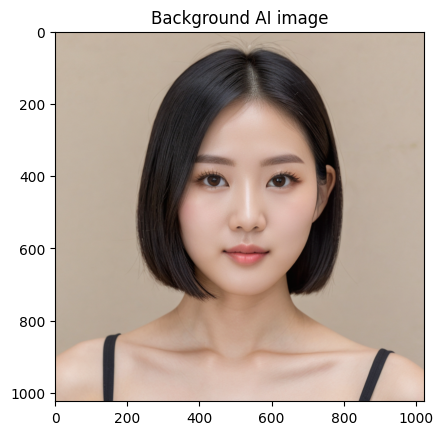

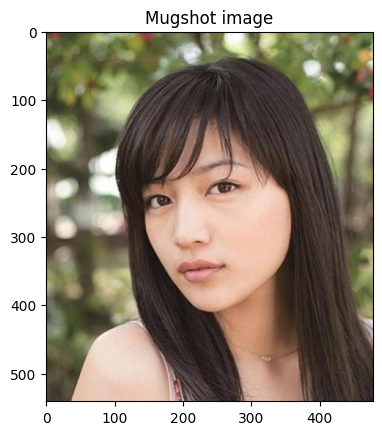

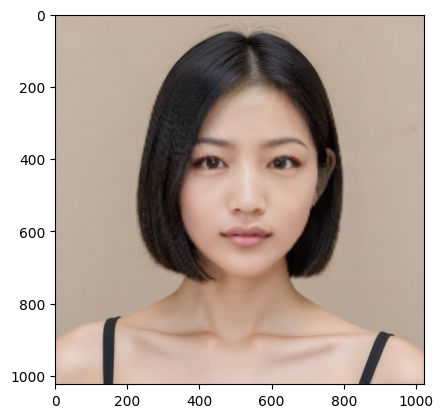

In [45]:
res2 = swapswap('/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0008_01_generated/HK0.png', '/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0008_01.jpg', show_steps=True, write=0)

plt.imshow(res2[:,:,::-1])
plt.show()

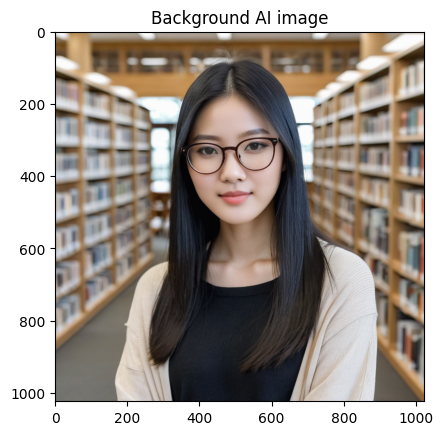

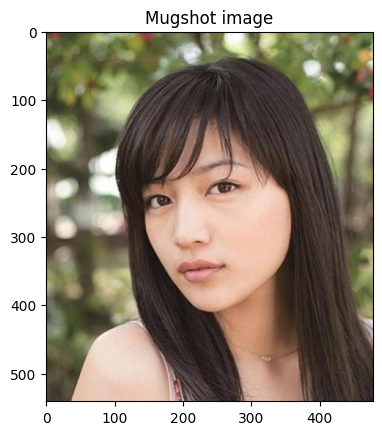

/opt/conda/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


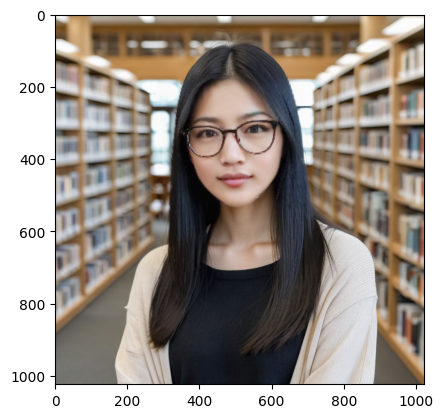

(1024, 1024, 3)

In [28]:
res2 = swapswap('/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0008_01_generated/HK1.png', '/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0008_01.jpg', show_steps=True, write=1)

plt.imshow(res2[:,:,::-1])
plt.show()

res2.shape

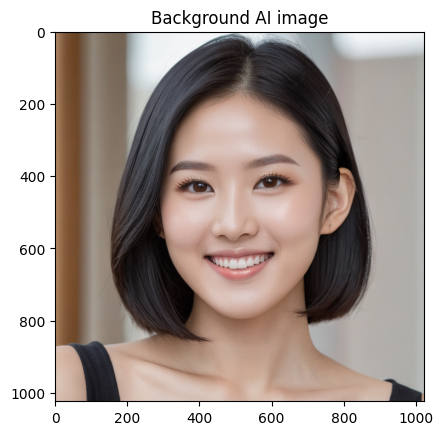

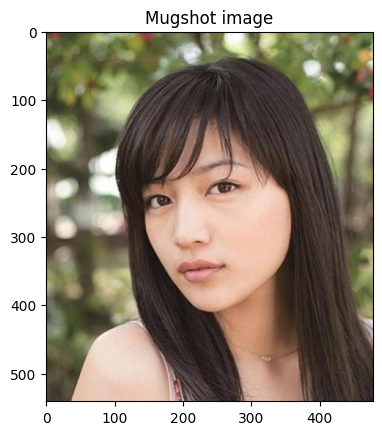

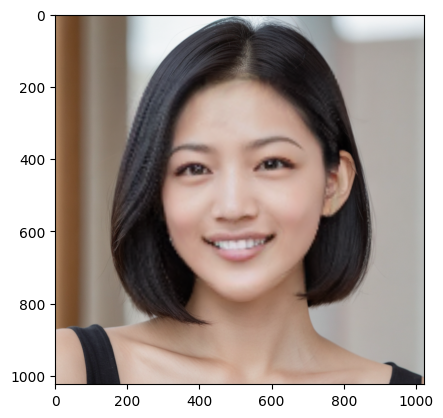

(1024, 1024, 3)

In [33]:
res2 = swapswap('/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0008_01_generated/HK5.png', '/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0008_01.jpg', show_steps=True, write=5)

plt.imshow(res2[:,:,::-1])
plt.show()

res2.shape

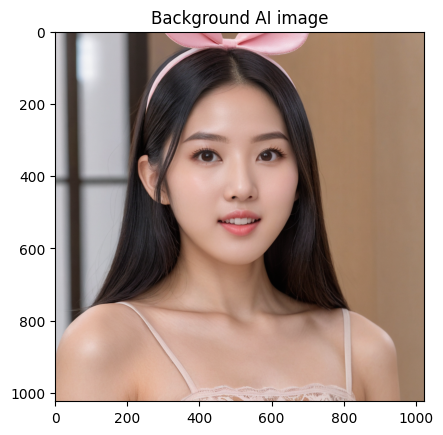

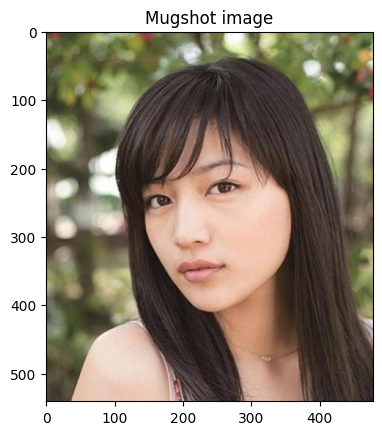

/opt/conda/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


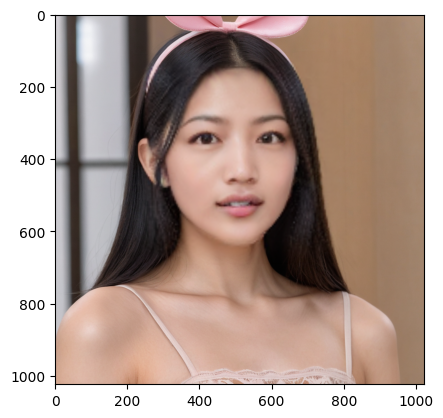

(1024, 1024, 3)

In [35]:
res2 = swapswap('/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0008_01_generated/HK6.png', '/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0008_01.jpg', show_steps=True, write=6)

plt.imshow(res2[:,:,::-1])
plt.show()

res2.shape

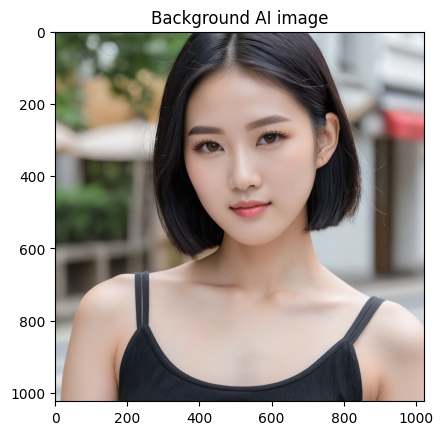

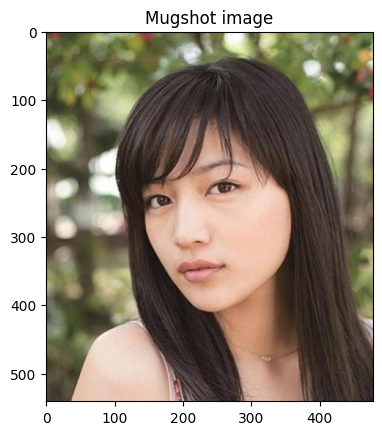

/opt/conda/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


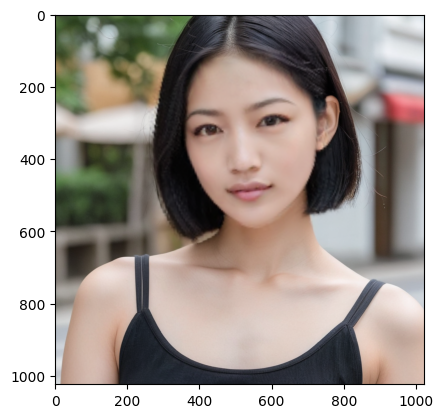

(1024, 1024, 3)

In [37]:
res2 = swapswap('/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0008_01_generated/HK7.png', '/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0008_01.jpg', show_steps=True, write=7)

plt.imshow(res2[:,:,::-1])
plt.show()

res2.shape

In [42]:
res2 = swapswap('/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0008_01_generated/HK10.png', '/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0008_01.jpg', show_steps=True)

plt.imshow(res2[:,:,::-1])
plt.show()

[ WARN:0@1916.128] global loadsave.cpp:248 findDecoder imread_('/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0008_01_generated/HK10.png'): can't open/read file: check file path/integrity


TypeError: 'NoneType' object is not subscriptable

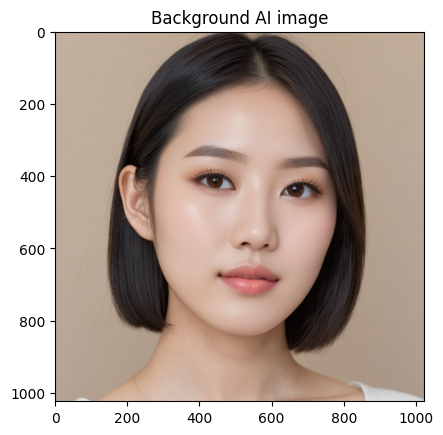

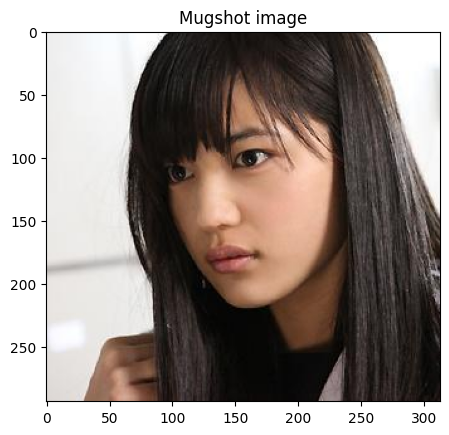

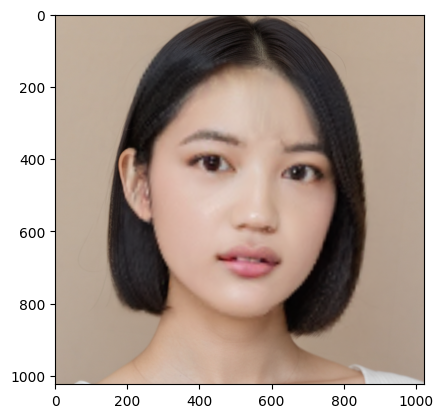

In [47]:
res2 = swapswap('/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0066_01_generated/HK0.png', '/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0066_01.jpg', show_steps=True, write=0)

plt.imshow(res2[:,:,::-1])
plt.show()

In [14]:
res2 = swapswap('/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0066_01_generated/HK8.png', '/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0066_01.jpg', show_steps=True)

plt.imshow(res2[:,:,::-1])
plt.show()

[ WARN:0@213.424] global loadsave.cpp:248 findDecoder imread_('/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0066_01_generated/HK8.png'): can't open/read file: check file path/integrity


TypeError: 'NoneType' object is not subscriptable

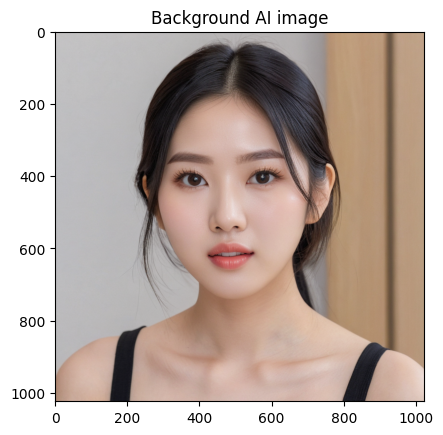

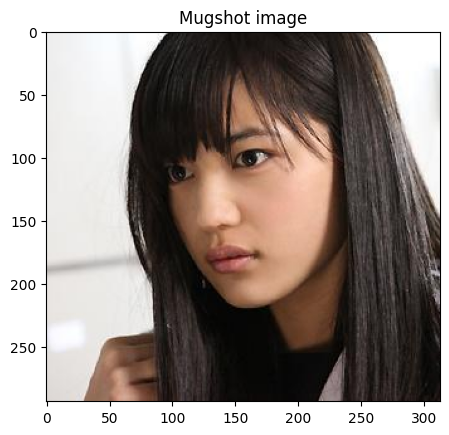

/opt/conda/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


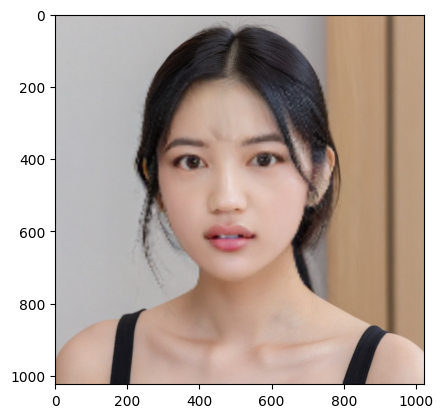

In [12]:
res2 = swapswap('/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0066_01_generated/HK6.png', '/home/apramey/FaceAugment/hard_images/Haruna_Kawaguchi/0066_01.jpg', show_steps=True, write=6)

plt.imshow(res2[:,:,::-1])
plt.show()